In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [212]:
df = pd.read_csv('/kaggle/input/sf-pricedata/Testing-Training Data - Sheet1.csv')
df.columns = [col.strip().lower() for col in df.columns]
df2=pd.read_csv('/kaggle/input/predictiondata/Prediction-Data.csv')
df2.head()

df.dropna(inplace=True)  # drop rows
df2.dropna(inplace=True)  # drop columns
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [213]:
x = df['sfvalue'].values
y = df['bitcoinprice'].values
x2 = df2['SFValue'].values
y2 = df2['BitCoinPrices'].values

x = x[x > 0]
y = y[:len(x)]
y = y[y > 0]
x = x[:len(y)]
x2 = x2[x2 > 0]
y2 = y2[:len(x2)]
y2 = y2[y2 > 0]
x2 = x2[:len(y2)]

In [214]:
log_x = np.log(x).reshape(-1, 1)
log_y = np.log(y)
log_x2 = np.log(x2).reshape(-1, 1)
log_y2 = np.log(y2)

In [215]:
xtrain, xtest, ytrain, ytest = train_test_split(log_x,log_y, test_size = 0.2) #testsize is the size of testing data

In [216]:
# Hyperparameter grid (more balanced)
param_grid = {
    'C': [100, 300],
    'kernel': ['linear'],
    'epsilon': [0.01, 0.1, 0.5]
}
xtrain = xtrain.reshape(-1, 1)
# Grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

print(grid_search.best_params_)

# Best model
svr = grid_search.best_estimator_

{'C': 300, 'epsilon': 0.1, 'kernel': 'linear'}


In [217]:
log_y_pred = svr.predict(xtest)
y_pred = np.exp(log_y_pred)

In [218]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSE and R2 use original y and predicted y
rmse = np.sqrt(mean_squared_error(ytest, log_y_pred))
r2 = r2_score(ytest, log_y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE (Root Mean Squared Error): 0.14
R² Score: 0.5466


In [219]:
a = svr.coef_[0][0]
b = svr.intercept_[0]
print(f"ln(price) = {a:.4f} * ln(SF) + {b:.4f}")

ln(price) = 51.8776 * ln(SF) + -224.9476


In [220]:
sf_future = 44.9  # Example value used in the paper
log_price_pred = svr.predict([[np.log(sf_future)]])[0]
price_forecast = np.exp(log_price_pred)
print(f"Forecasted price for SF={sf_future}: ${price_forecast:.2f}")

Forecasted price for SF=44.9: $0.00


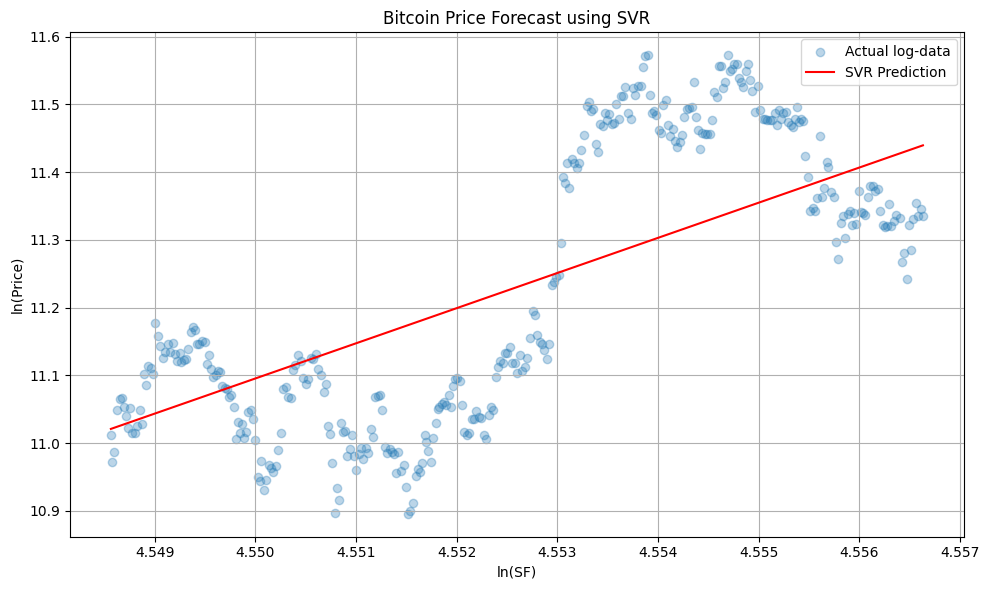

In [221]:
def_y_pred=svr.predict(log_x)
plt.figure(figsize=(10, 6))
plt.scatter(log_x, log_y, alpha=0.3, label='Actual log-data')
plt.plot(log_x, def_y_pred, color='red', label='SVR Prediction')
plt.xlabel('ln(SF)')
plt.ylabel('ln(Price)')
plt.title('Bitcoin Price Forecast using SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [222]:
predictions=svr.predict(log_x2)
actual_values=log_y2
#print(predictions)
print()
#print(actual_values)
finalrmse = np.sqrt(mean_squared_error(ytest, log_y_pred))
print(f"RMSE (Root Mean Squared Error): {finalrmse:.2f}")
finalr2 = r2_score(actual_values, predictions)
print(f"R² Score: {finalr2:.4f}")


RMSE (Root Mean Squared Error): 0.14
R² Score: 0.3540


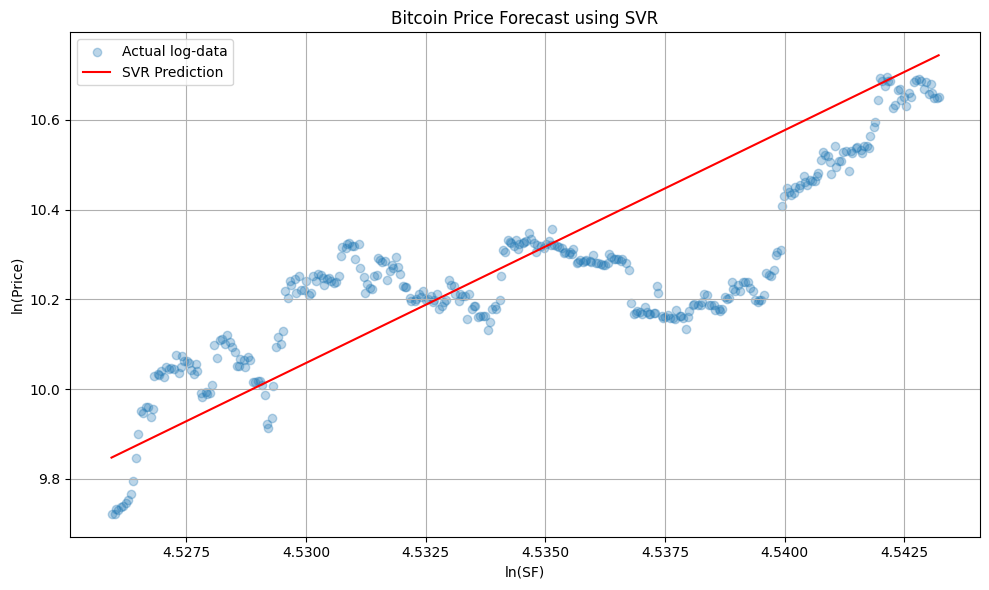

In [223]:
plt.figure(figsize=(10, 6))
plt.scatter(log_x2, log_y2, alpha=0.3, label='Actual log-data')
plt.plot(log_x2, predictions, color='red', label='SVR Prediction')
plt.xlabel('ln(SF)')
plt.ylabel('ln(Price)')
plt.title('Bitcoin Price Forecast using SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()